In [1]:
# imports

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error, accuracy_score

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
# Constants

PREPARATION_PATH='data/preparation/'
PRESENTATION_PATH='data/presentation/'
PROCESSED_FILENAME=PREPARATION_PATH + 'framingham Processed.csv'

In [3]:
df = pd.read_csv(PROCESSED_FILENAME)
df.head()

,age,education,currentSmoker,prevalentHyp,sysBP,BMI,heartRate,TenYearCHD
0,-0.714286,1.0,0.0,0.0,-0.916667,0.332623,0.357143,0
1,-0.214286,0.0,0.0,0.0,-0.291667,0.707889,1.428571,0
2,-0.071429,-0.5,1.0,0.0,-0.020833,-0.014925,0.000000,0
3,0.857143,0.5,1.0,1.0,0.916667,0.675906,-0.714286,1
4,-0.214286,0.5,1.0,0.0,0.083333,-0.492537,0.714286,0


In [4]:
# get the distribution of data in life expectancy
led = df['TenYearCHD'].describe()
led.to_csv(PRESENTATION_PATH + 'TenYearCHD.csv')
led

count    4238.000000
mean        0.151958
std         0.359023
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [5]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# rebalance data to avoid bias
smote = SMOTE(random_state=13)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# train
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

LogisticRegression()

Accuracy: 0.6497641509433962
Mean Absolute Error: 0.35023584905660377
Mean Squared Error: 0.35023584905660377
Root Mean Squared Error: 0.5918072735752778
R-squared: -1.6982644096850223


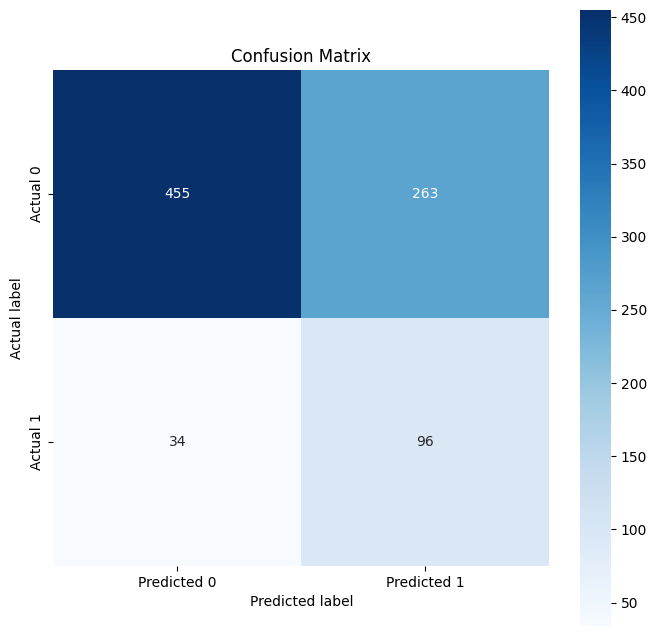

In [6]:
y_pred = model.predict(X_test[list])

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig(PRESENTATION_PATH + 'confusion_matrix.png')
plt.show()

In [7]:
X_test.head(10)

,age,education,currentSmoker,prevalentHyp,sysBP,BMI,heartRate
3853,0.428571,1.0,0.0,1.0,1.854167,1.462687,-1.214286
949,-1.071429,0.0,1.0,0.0,-0.437500,-0.985075,-0.857143
215,-0.285714,-0.5,1.0,1.0,0.479167,-0.663113,0.142857
1458,0.214286,0.0,0.0,0.0,0.291667,0.874200,-0.785714
1247,-0.428571,0.0,1.0,0.0,-0.625000,0.837953,1.785714
1732,0.214286,0.0,0.0,0.0,-0.166667,-0.434968,-1.214286
4076,0.857143,-0.5,0.0,1.0,0.000000,0.872068,-0.500000
1016,0.928571,0.5,0.0,0.0,-0.354167,0.658849,-0.500000
3490,0.857143,1.0,0.0,0.0,-0.083333,-0.479744,-0.071429
1831,0.000000,0.5,0.0,0.0,0.000000,-0.115139,0.000000


In [8]:
y_pred[0:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [9]:
with open(PRESENTATION_PATH + 'x_columns.pkl', 'wb') as file:
    pickle.dump(X_test.columns, file)